<a href="https://colab.research.google.com/github/sepidehrezvani/10-/blob/main/simulation_of_article_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision torchaudio

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
class ResourceNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ResourceNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return torch.sigmoid(self.fc2(x))

In [3]:
def local_train(model, data, labels, epochs=5, lr=0.01):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    for _ in range(epochs):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, labels)
        loss.backward()
        optimizer.step()
    return model.state_dict()

In [4]:
def federated_avg(global_model, local_models):
    new_state = {}
    for key in global_model.state_dict().keys():
        new_state[key] = sum([lm[key] for lm in local_models]) / len(local_models)
    global_model.load_state_dict(new_state)
    return global_model

In [5]:
def add_noise_to_weights(weights, noise_level=0.01):
    noisy = {}
    for k, v in weights.items():
        noisy[k] = v + noise_level * torch.randn_like(v)
    return noisy

In [6]:
def add_noise_to_weights(weights, noise_level=0.01):
    noisy = {}
    for k, v in weights.items():
        noisy[k] = v + noise_level * torch.randn_like(v)
    return noisy

In [7]:
# فرض کنیم هر BS داده‌های خودش رو داره
num_BS = 3
input_dim = 10   # ویژگی‌های کاربر
hidden_dim = 32
output_dim = 1   # تخصیص منابع (مثلاً توان یا نرخ)

global_model = ResourceNet(input_dim, hidden_dim, output_dim)

# داده‌های تصادفی برای هر BS
local_data = [torch.rand(50, input_dim) for _ in range(num_BS)]
local_labels = [torch.rand(50, output_dim) for _ in range(num_BS)]

In [8]:
rounds = 10
for r in range(rounds):
    local_models = []
    for i in range(num_BS):
        local_model = ResourceNet(input_dim, hidden_dim, output_dim)
        local_model.load_state_dict(global_model.state_dict())
        weights = local_train(local_model, local_data[i], local_labels[i])
        weights_noisy = add_noise_to_weights(weights, noise_level=0.01)
        local_models.append(weights_noisy)
    global_model = federated_avg(global_model, local_models)
    print(f"Round {r+1} completed")

Round 1 completed
Round 2 completed
Round 3 completed
Round 4 completed
Round 5 completed
Round 6 completed
Round 7 completed
Round 8 completed
Round 9 completed
Round 10 completed


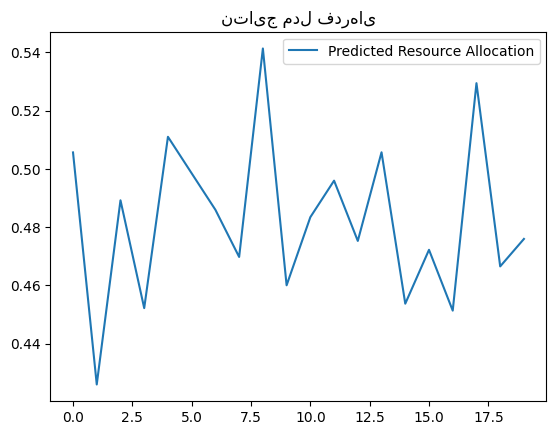

In [9]:
test_data = torch.rand(20, input_dim)
pred = global_model(test_data).detach().numpy()

plt.plot(pred, label="Predicted Resource Allocation")
plt.legend()
plt.title("نتایج مدل فدره‌ای")
plt.show()